# NHL Playoff Predictor Data Story

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("NHL Team data.csv")
df.head()

,Name,Team,Season,GP,TOI,GF%,SF%,FF%,CF%,xGF%,...,CA/60,xGF/60,xGA/60,G±/60,S±/60,G±/60.1,F±/60,xG±/60,Sh%,Sv%
0,Ducks,ANA,18-19,82,4075.73,46.81,46.62,46.59,46.86,44.97,...,60.47,2.26,2.77,-0.29,-4.00,-5.81,-7.14,-0.51,7.59,92.47
1,Coyotes,ARI,18-19,82,4078.72,45.87,49.58,49.22,48.83,49.37,...,58.93,2.35,2.41,-0.37,-0.51,-1.32,-2.69,-0.06,6.82,92.08
2,Bruins,BOS,18-19,82,4125.25,56.01,53.84,53.92,53.45,53.03,...,50.91,2.45,2.17,0.53,4.59,6.50,7.56,0.28,7.67,92.98
3,Sabres,BUF,18-19,82,4142.15,44.36,48.87,49.28,49.34,47.32,...,56.75,2.24,2.50,-0.58,-1.46,-1.26,-1.48,-0.25,7.23,91.34
4,Hurricanes,CAR,18-19,82,4079.05,51.67,54.97,55.23,55.32,55.79,...,52.46,3.07,2.43,0.16,6.15,9.27,12.48,0.64,7.27,91.70


In [3]:
df1 = pd.read_csv("nhl team basic data.csv")
df1.head()

,Season,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,18-19,Anaheim Ducks,27.5,82,35,37,10,80,0.488,196,...,79.70,5,10,9.0,7.2,2271,8.6,2725,0.909,4
1,18-19,Arizona Coyotes,27.2,82,39,35,8,86,0.524,209,...,84.96,16,9,7.1,8.2,2522,8.3,2526,0.913,6
2,18-19,Boston Bruins*,28.7,82,49,24,9,107,0.652,257,...,79.92,7,15,9.7,9.9,2680,9.6,2416,0.912,9
3,18-19,Buffalo Sabres,26.6,82,33,39,10,76,0.463,221,...,80.93,3,9,7.0,7.5,2697,8.2,2704,0.901,2
4,18-19,Calgary Flames*,27.7,82,50,25,7,107,0.652,289,...,79.67,18,7,8.5,9.8,2656,10.9,2302,0.903,3


Checking for Null values

In [4]:
df.isnull().sum()

Name       0
Team       0
Season     0
GP         0
TOI        0
GF%        0
SF%        0
FF%        0
CF%        0
xGF%       0
GF/60      0
GA/60      0
SF/60      0
SA/60      0
FF/60      0
FA/60      0
CF/60      0
CA/60      0
xGF/60     0
xGA/60     0
G±/60      0
S±/60      0
G±/60.1    0
F±/60      0
xG±/60     0
Sh%        0
Sv%        0
dtype: int64

No Null values so let me check for outliers

In [5]:
print(df1.boxplot(column=['GF', 'GA']))

AxesSubplot(0.125,0.11;0.775x0.77)


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Density')

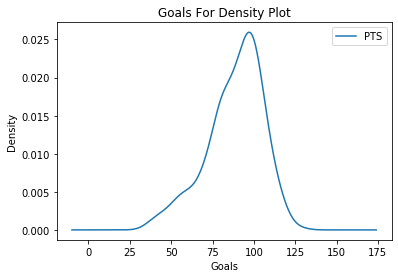

In [6]:
import matplotlib.pyplot as plt

print(df1[['PTS']].plot.density())
plt.title('Goals For Density Plot')
plt.xlabel('Goals')
plt.ylabel('Density')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Density')

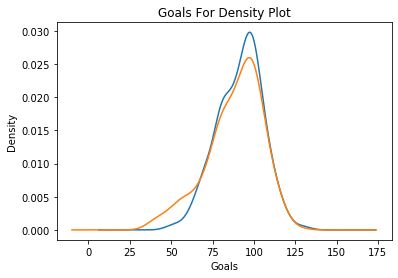

In [7]:
import matplotlib.pyplot as plt

df2 = df1['PTS']/(df1['GP']*2)*82*2

print(df2.plot.density())
print(df1['PTS'].plot.density())
plt.title('Goals For Density Plot')
plt.xlabel('Goals')
plt.ylabel('Density')

I know exactly what the issue is here and this is why I made the feature "Goals for per game" and not just "Goals for." The 2013 shortened season where teams didn't play 82 games are all considered to be outliers

In [8]:
df1['GF/G'] = df1['GF']/df1['GP']
df1['GA/G'] = df1['GA']/df1['GP']

Now let's try with games played taken into account

AxesSubplot(0.125,0.125;0.775x0.755)


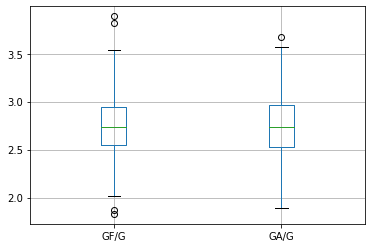

In [9]:
print(df1.boxplot(column=['GF/G', 'GA/G']))

AxesSubplot(0.125,0.125;0.775x0.755)


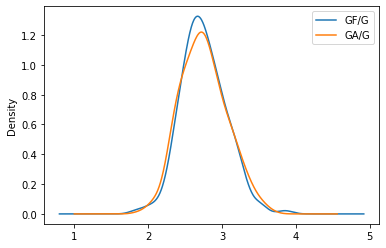

In [10]:
print(df1[['GF/G','GA/G']].plot.density())

Still some outliers but those are good values

In [11]:
print(df1.iloc[df1['GF/G'].idxmin()])

Season             13-14
Team      Buffalo Sabres
AvAge               26.6
GP                    82
W                     21
L                     51
OL                    10
PTS                   52
PTS%               0.317
GF                   150
GA                   243
SOW                    7
SOL                    5
SRS                -1.09
SOS                 0.02
TG/G                4.79
EVGF                 109
EVGA                 187
PP                    36
PPO                  256
PP%                14.06
PPA                   51
PPOA                 274
PK%                81.39
SH                     5
SHA                    5
PIM/G                 11
oPIM/G              10.4
S                   2156
S%                     7
SA                  2816
SV%                0.914
SO                     0
GF/G             1.82927
GA/G             2.96341
Name: 154, dtype: object


This team was tanking so this makes sense

AxesSubplot(0.125,0.125;0.775x0.755)


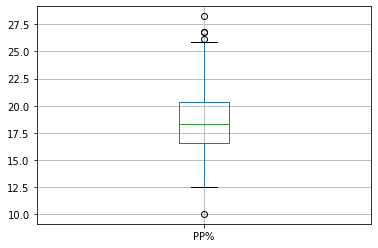

In [12]:
print(df1.boxplot(column=['PP%']))

AxesSubplot(0.125,0.125;0.775x0.755)


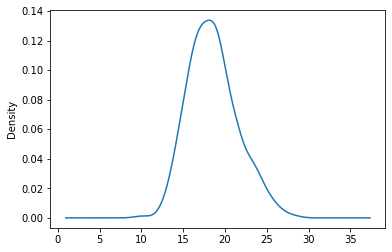

In [13]:
print(df1['PP%'].plot.density())

In [14]:
print(df1.iloc[df1['PP%'].idxmin()])

Season               13-14
Team      Florida Panthers
AvAge                   29
GP                      82
W                       29
L                       45
OL                       8
PTS                     66
PTS%                 0.402
GF                     188
GA                     262
SOW                      8
SOL                      6
SRS                  -0.87
SOS                   0.01
TG/G                  5.49
EVGF                   153
EVGA                   193
PP                      27
PPO                    269
PP%                  10.04
PPA                     63
PPOA                   262
PK%                  75.95
SH                       8
SHA                      6
PIM/G                 10.3
oPIM/G                10.9
S                     2451
S%                     7.7
SA                    2551
SV%                  0.897
SO                       1
GF/G               2.29268
GA/G               3.19512
Name: 163, dtype: object


When I saw that the lowest PP% was 10% I was expecting a team from the shortened season but to do that for 82 games YIKES

AxesSubplot(0.125,0.125;0.775x0.755)


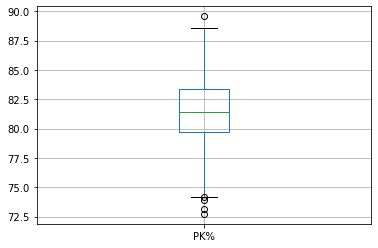

In [15]:
print(df1.boxplot(column=['PK%']))

AxesSubplot(0.125,0.125;0.775x0.755)


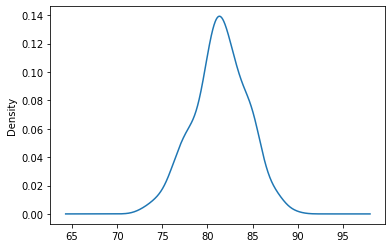

In [16]:
print(df1['PK%'].plot.density())

Powerplay and penalty kill percentage are good to go because they are percentages, not value counts

In [17]:
print(df1.iloc[df1['PK%'].idxmin()])

Season                 18-19
Team      Chicago Blackhawks
AvAge                   28.5
GP                        82
W                         36
L                         34
OL                        12
PTS                       84
PTS%                   0.512
GF                       267
GA                       291
SOW                        3
SOL                        1
SRS                    -0.25
SOS                     0.02
TG/G                     6.8
EVGF                     213
EVGA                     221
PP                        48
PPO                      238
PP%                    20.17
PPA                       63
PPOA                     231
PK%                    72.73
SH                         6
SHA                        7
PIM/G                    7.3
oPIM/G                   7.1
S                       2669
S%                        10
SA                      2852
SV%                    0.898
SO                         2
GF/G                  3.2561
GA/G          

The 2018-19 Blackhawks got scored on 3 out of every 4 penalty kills. That seems like a recipe for not making the playoffs

AxesSubplot(0.125,0.125;0.775x0.755)


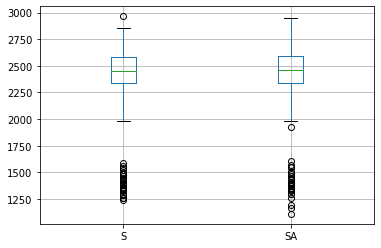

In [18]:
print(df1.boxplot(column=['S', 'SA']))

AxesSubplot(0.125,0.125;0.775x0.755)


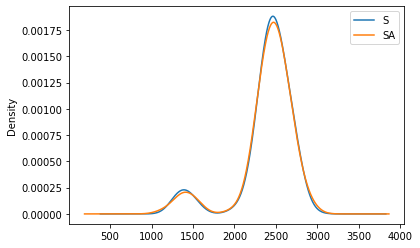

In [19]:
print(df1[['S', 'SA']].plot.density())

Same issue with the 2013 season so lets divide by games played

In [20]:
df1['S/G'] = df1['S']/df1['GP']
df1['SA/G'] = df1['SA']/df1['GP']

AxesSubplot(0.125,0.125;0.775x0.755)


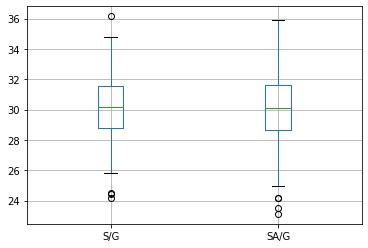

In [21]:
print(df1.boxplot(column=['S/G', 'SA/G']))

AxesSubplot(0.125,0.125;0.775x0.755)


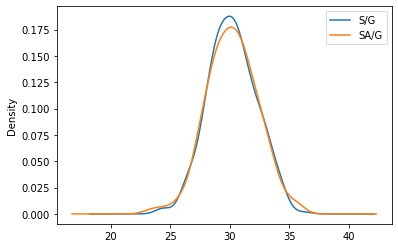

In [22]:
print(df1[['S/G', 'SA/G']].plot.density())

There are still some outliers but those are just really good or really bad teams nothing wrong here

In [23]:
print(df1.iloc[df1['S/G'].idxmax()])

Season                 08-09
Team      Detroit Red Wings*
AvAge                   31.2
GP                        82
W                         51
L                         21
OL                        10
PTS                      112
PTS%                   0.683
GF                       289
GA                       240
SOW                        6
SOL                        4
SRS                     0.62
SOS                        0
TG/G                    6.45
EVGF                     193
EVGA                     165
PP                        90
PPO                      353
PP%                     25.5
PPA                       71
PPOA                     327
PK%                    78.29
SH                         6
SHA                        4
PIM/G                     10
oPIM/G                  10.9
S                       2965
S%                       9.7
SA                      2274
SV%                    0.894
SO                         8
GF/G                 3.52439
GA/G          

An insanely good team that won the Stanley Cup that year so no suprise there

AxesSubplot(0.125,0.125;0.775x0.755)


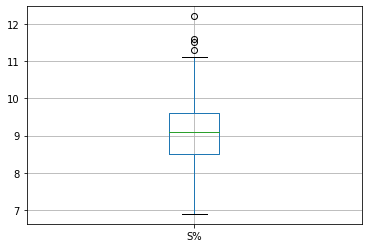

In [24]:
print(df1.boxplot(column=['S%']))

AxesSubplot(0.125,0.125;0.775x0.755)


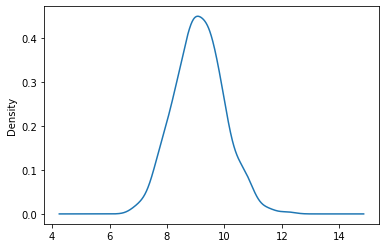

In [25]:
print(df1['S%'].plot.density())

In [26]:
print(df1.iloc[df1['S%'].idxmax()])

Season                   18-19
Team      Tampa Bay Lightning*
AvAge                     27.1
GP                          82
W                           62
L                           16
OL                           4
PTS                        128
PTS%                      0.78
GF                         319
GA                         221
SOW                          6
SOL                          1
SRS                       1.21
SOS                      -0.05
TG/G                      6.59
EVGF                       233
EVGA                       178
PP                          74
PPO                        262
PP%                      28.24
PPA                         40
PPOA                       267
PK%                      85.02
SH                          12
SHA                          3
PIM/G                      9.5
oPIM/G                     9.4
S                         2620
S%                        12.2
SA                        2633
SV%                      0.916
SO      

This team set records in many different categories so it doesn't suprise me to see that they converted the most of their shots into goals with their shooting talent. They regressed hard in the playoffs when they were swept in four games.

AxesSubplot(0.125,0.125;0.775x0.755)


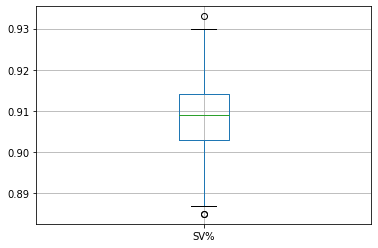

In [27]:
print(df1.boxplot(column=['SV%']))

AxesSubplot(0.125,0.125;0.775x0.755)


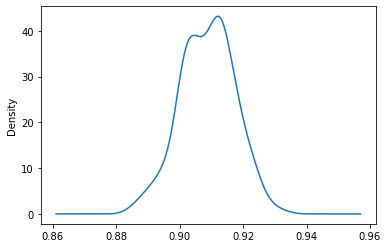

In [28]:
print(df1['SV%'].plot.density())

Shooting percentage and save percentage are all set because these came as percentages and not counts

In [29]:
print(df1.iloc[df1['SV%'].idxmax()])

Season               12-13
Team      Ottawa Senators*
AvAge                 27.4
GP                      48
W                       25
L                       17
OL                       6
PTS                     56
PTS%                 0.583
GF                     112
GA                     100
SOW                      4
SOL                      4
SRS                   0.27
SOS                   0.02
TG/G                  4.42
EVGF                    85
EVGA                    79
PP                      25
PPO                    157
PP%                  15.92
PPA                     20
PPOA                   167
PK%                  88.02
SH                       2
SHA                      1
PIM/G                 13.6
oPIM/G                13.8
S                     1591
S%                       7
SA                    1502
SV%                  0.933
SO                       4
GF/G               2.33333
GA/G               2.08333
S/G                33.1458
SA/G               31.2917
N

The 2012-13 Ottawa Senators had some insane goaltending that year. Their three goalies were Craig Anderson, Ben Bishop and Robin Lehner who are all now starting goalies, so that helps.

AxesSubplot(0.125,0.125;0.775x0.755)


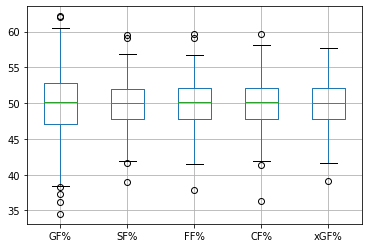

In [30]:
print(df.boxplot(column=['GF%','SF%','FF%','CF%','xGF%']))

I can show all five of these features in one chart because they should all average around 50%. Some outliers but those are just good or bad teams so nothing to do here.

So when I was looking at the max values of each of these statistics I noticed something: the leader of each of these stats won the Stanley Cup that year...that bodes well

AxesSubplot(0.125,0.125;0.775x0.755)


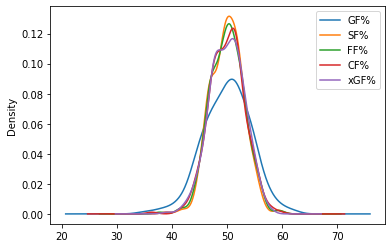

In [31]:
print(df[['GF%','SF%','FF%','CF%','xGF%']].plot.density())

Looks pretty normal to me

AxesSubplot(0.125,0.125;0.775x0.755)


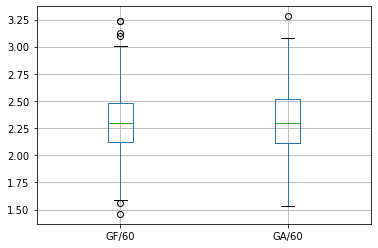

In [32]:
print(df.boxplot(column=['GF/60','GA/60']))

AxesSubplot(0.125,0.125;0.775x0.755)


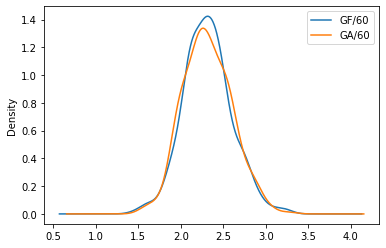

In [33]:
print(df[['GF/60','GA/60']].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


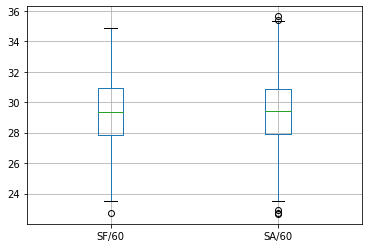

In [34]:
print(df.boxplot(column=['SF/60','SA/60']))

AxesSubplot(0.125,0.125;0.775x0.755)


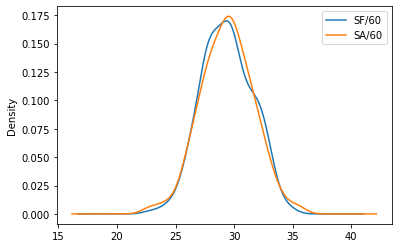

In [35]:
print(df[['SF/60','SA/60']].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


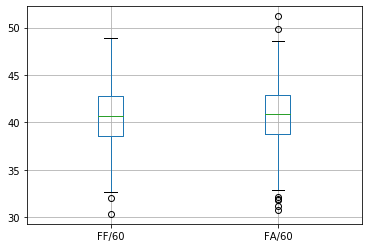

In [36]:
print(df.boxplot(column=['FF/60','FA/60']))

AxesSubplot(0.125,0.125;0.775x0.755)


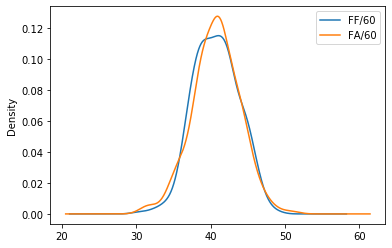

In [37]:
print(df[['FF/60','FA/60']].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


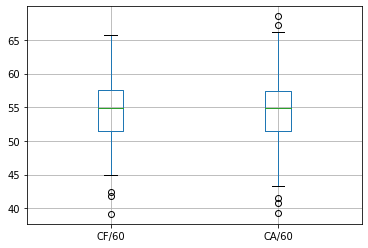

In [38]:
print(df.boxplot(column=['CF/60','CA/60']))

AxesSubplot(0.125,0.125;0.775x0.755)


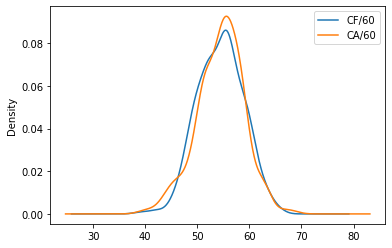

In [39]:
print(df[['CF/60','CA/60']].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


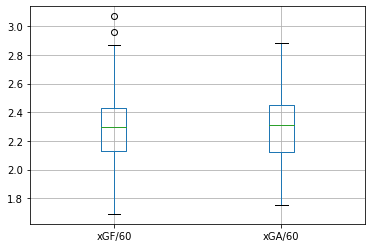

In [40]:
print(df.boxplot(column=['xGF/60','xGA/60']))

AxesSubplot(0.125,0.125;0.775x0.755)


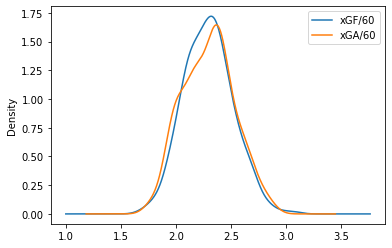

In [41]:
print(df[['xGF/60','xGA/60']].plot.density())

All of these per 60 stats should be normal because it takes ice time and games played into account so I don't have to worry about the 2013 shortened season.

AxesSubplot(0.125,0.125;0.775x0.755)


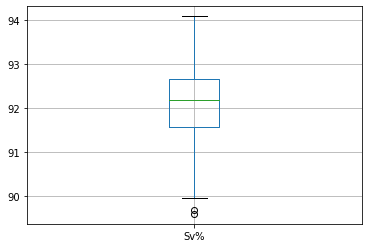

In [42]:
print(df.boxplot(column=['Sv%']))

AxesSubplot(0.125,0.125;0.775x0.755)


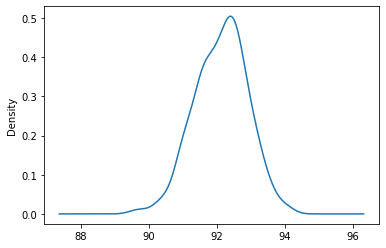

In [43]:
print(df['Sv%'].plot.density())

This looks good. This is different than the other save percentage above because this is only at even strength. This means this does not account for power play goals or short handed goals. This is good representation of the goaltending a team gets during most of the game.

AxesSubplot(0.125,0.125;0.775x0.755)


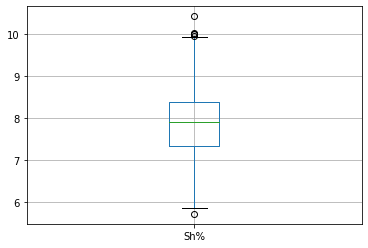

In [44]:
print(df.boxplot(column=['Sh%']))

AxesSubplot(0.125,0.125;0.775x0.755)


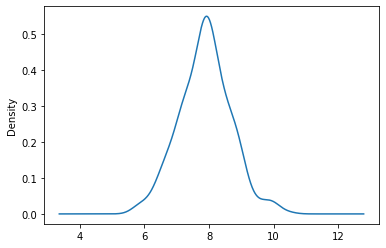

In [45]:
print(df['Sh%'].plot.density())

This also looks good. This is different than the other shooting percentage above because this is only at even strength. Typically this is lower because teams have better oppurtunties to score on the powerplay. This is shown below.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


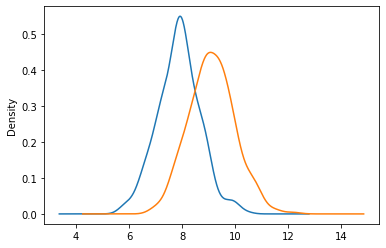

In [46]:
print(df['Sh%'].plot.density())
print(df1['S%'].plot.density())

# Descriptive stats for each feature

In [47]:
print(df[['GF%','SF%','FF%','CF%','xGF%','GF/60','GA/60','SF/60','SA/60','FF/60','FA/60','CF/60','CA/60','xGF/60','xGA/60','Sh%','Sv%']].describe())

              GF%         SF%         FF%         CF%        xGF%       GF/60  \
count  362.000000  362.000000  362.000000  362.000000  362.000000  362.000000   
mean    50.007901   50.005028   50.008453   50.008287   50.011409    2.314558   
std      4.365028    2.903965    3.038022    3.128794    3.076405    0.283275   
min     34.520000   38.950000   37.800000   36.350000   39.080000    1.460000   
25%     47.047500   47.830000   47.742500   47.795000   47.795000    2.120000   
50%     50.165000   50.050000   50.095000   50.140000   50.080000    2.300000   
75%     52.855000   51.987500   52.115000   52.065000   52.170000    2.480000   
max     62.150000   59.530000   59.710000   59.680000   57.760000    3.240000   

            GA/60       SF/60       SA/60       FF/60       FA/60       CF/60  \
count  362.000000  362.000000  362.000000  362.000000  362.000000  362.000000   
mean     2.314448   29.388149   29.390249   40.723950   40.725470   54.454365   
std      0.285126    2.1540

In [48]:
print(df1[['GF/G','GA/G','PP%','PK%','S/G','SA/G','S%','SV%']].describe())

             GF/G        GA/G         PP%         PK%         S/G        SA/G  \
count  362.000000  362.000000  362.000000  362.000000  362.000000  362.000000   
mean     2.752737    2.752737   18.542928   81.407818   30.188367   30.188367   
std      0.305724    0.315721    2.938600    2.989266    2.020174    2.149661   
min      1.829268    1.890244   10.040000   72.730000   24.195122   23.125000   
25%      2.548780    2.524390   16.530000   79.702500   28.791921   28.685976   
50%      2.731707    2.731707   18.345000   81.455000   30.146087   30.140244   
75%      2.948171    2.960366   20.312500   83.395000   31.570122   31.637195   
max      3.890244    3.670732   28.240000   89.580000   36.158537   35.914634   

               S%         SV%  
count  362.000000  362.000000  
mean     9.124309    0.908771  
std      0.863841    0.008578  
min      6.900000    0.885000  
25%      8.500000    0.903000  
50%      9.100000    0.909000  
75%      9.600000    0.914000  
max     12.200

# Breakdown

The only issues I ran into were the shortened season in 2013 caused me to need to account for games played. This is good because then I can predict teams playoffs hopes before the season ends, the way this is supposed to be used. There weren't any outliers or transformations I needed to adjust because those are just really good or bad teams.

Let me address some of the possible features I omitted:
- Average age: I have always had a problem with average age being used to evaluate how old a team is. Let me give an example: in 2016-17, Connor McDavid, age 19, played on average 21:08 minutes, while Matt Hendricks, age 35, averaged 10:35 minutes. These two players have the same impact on average age but Connor McDavid is a much more important player for the Oilers. 

Here's one more example because I am crazy:
    

In 2017-18 the Toronto Maple Leafs were 15th in the league for average age, but when you look at their youngest players you get:
- Auston Matthews, age 20, first line center 2nd on the team in points
- Mitch Marner, age 20, top six winger who led team in points
- William Nylander, age 21, top six winger who was 3rd on team in points
- Morgan Rielly, age 23, top defenseman who averaged 21:36 minutes a night

And then you look at some of their oldest players:
- Dominic Moore, age 37, fourth line center who averaged 10:16 minutes a night
- Tomas Plekanec, age 35, averaged 11:00 minutes
- Curtis McElhinney, age 34, backup goalie
- Eric Fehr, age 32, who only played in 4 games(!)

You can't tell me these players had the same impact on the team therefore average age is bad. This stat unfairly punishes teams with good young players. 

Other possible features I omitted:

- I can't just use wins, losses, points because that is how you make the playoffs not an indicator of success
- Strength of schedule: can't use this one because in the NHL each team plays all the other teams at least once. So because of that, having a hard schedule is basically just indicating that you are a bad team because you didn't have to play yourself. If you look at last year the top 5 hardest schedules finished last, third to last, fourth to last, fifth to last, and sixth to last respectively.
- The rest of the stats don't add anything to team success.